* Integrantes: David Cruz - Jimmy Muso

In [13]:
# Importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

In [14]:
# Carga y Preparación de Datos
df = pd.read_csv('./dataset/Dormir.csv', sep=';')
print(df.head())
df.info()

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer              61   
1          2   Male   28                Doctor              62   
2          3   Male   28                Doctor              62   
3          4   Male   28  Sales Representative              59   
4          5   Male   28  Sales Representative              59   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [15]:
# Preprocesamiento de Datos
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])
df.drop('Blood Pressure', axis=1, inplace=True)

df['Sleep Duration'] = df['Sleep Duration'] / 10
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

Gender
Male      6.968254
Female    7.664865
Name: Quality of Sleep, dtype: float64


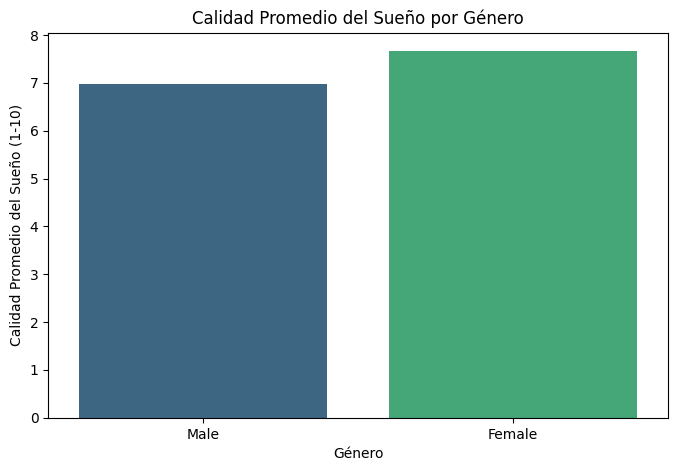

In [ ]:
# Pregunta 1: ¿Quiénes tienen peor calidad del sueño, hombres o mujeres?
calidad_genero = df.groupby('Gender')['Quality of Sleep'].mean().sort_values()
print(calidad_genero)
plt.figure(figsize=(8, 5))
sns.barplot(x=calidad_genero.index, y=calidad_genero.values, palette='viridis', hue=calidad_genero.index, legend=False)
plt.title('Calidad Promedio del Sueño por Género')
plt.xlabel('Género')
plt.ylabel('Calidad Promedio del Sueño (1-10)')
plt.show()


 Preguntas 2 y 4: Calidad del sueño por profesión
Occupation
Sales Representative    4.000000
Scientist               5.000000
Salesperson             6.000000
Software Engineer       6.500000
Doctor                  6.647887
Teacher                 6.975000
Manager                 7.000000
Nurse                   7.369863
Accountant              7.891892
Lawyer                  7.893617
Engineer                8.412698
Name: Quality of Sleep, dtype: float64

La profesión con la peor calidad de sueño es: Sales Representative


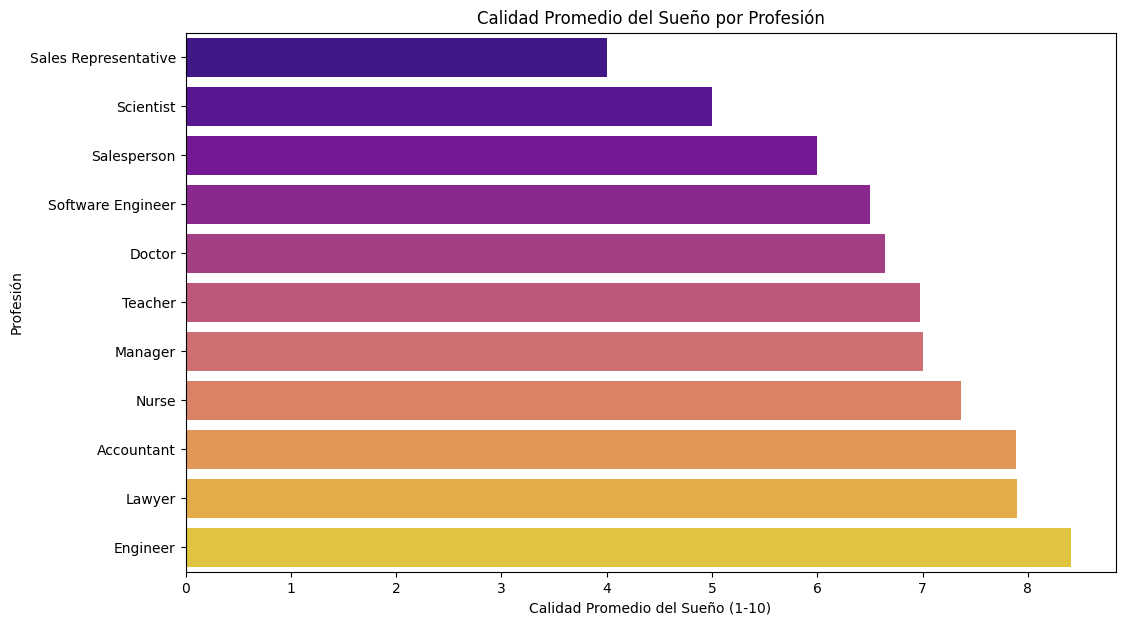

In [17]:
# Pregunta 2 y 4: ¿Existe una relación entre la calidad del sueño de las personas y su profesión? ¿Qué profesión presenta la peor calidad de sueño?
print("\n Preguntas 2 y 4: Calidad del sueño por profesión")
calidad_profesion = df.groupby('Occupation')['Quality of Sleep'].mean().sort_values()
print(calidad_profesion)
peor_profesion = calidad_profesion.idxmin()
print(f"\nLa profesión con la peor calidad de sueño es: {peor_profesion}")
plt.figure(figsize=(12, 7))
sns.barplot(x=calidad_profesion.values, y=calidad_profesion.index, palette='plasma', hue=calidad_profesion.index, legend=False)
plt.title('Calidad Promedio del Sueño por Profesión')
plt.xlabel('Calidad Promedio del Sueño (1-10)')
plt.ylabel('Profesión')
plt.show()


 Pregunta 3: Actividad física vs. Calidad del sueño
La correlación entre el nivel de actividad física y la calidad del sueño es: 0.1929


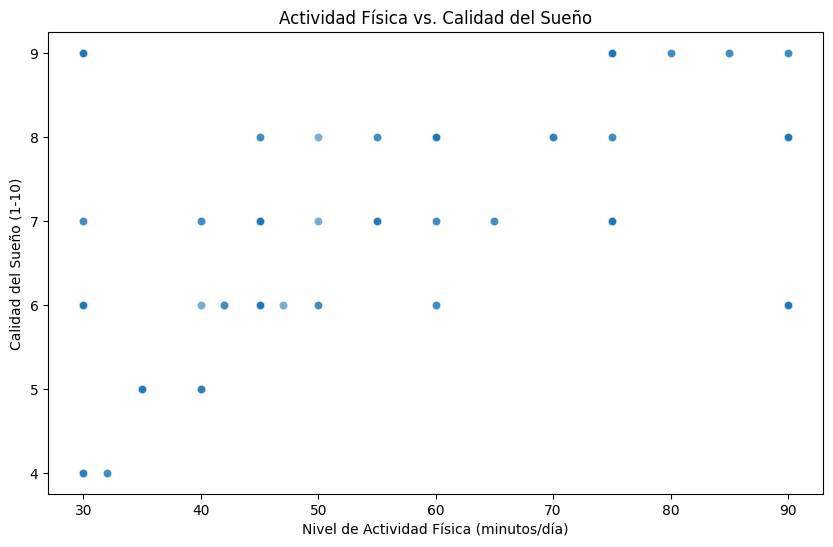

In [18]:
# Pregunta 3: ¿La actividad física afecta al sueño?
print("\n Pregunta 3: Actividad física vs. Calidad del sueño")
correlacion_actividad_sueno = df['Physical Activity Level'].corr(df['Quality of Sleep'])
print(f"La correlación entre el nivel de actividad física y la calidad del sueño es: {correlacion_actividad_sueno:.4f}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical Activity Level', y='Quality of Sleep', data=df, alpha=0.6)
plt.title('Actividad Física vs. Calidad del Sueño')
plt.xlabel('Nivel de Actividad Física (minutos/día)')
plt.ylabel('Calidad del Sueño (1-10)')
plt.show()

In [19]:
# Pregunta 5: ¿Cuál profesión tienen a las personas con el mayor nivel de estrés y el mayor índice de masa corporal?
print("\n Pregunta 5: Profesión con mayor estrés e IMC")
bmi_map = {'Normal': 0, 'Normal Weight': 0, 'Overweight': 1, 'Obese': 2}
df['BMI_Numeric'] = df['BMI Category'].map(bmi_map)
estres_imc_profesion = df.groupby('Occupation')[['Stress Level', 'BMI_Numeric']].mean()
profesion_mas_estres = estres_imc_profesion['Stress Level'].idxmax()
print(f"La profesión con el mayor nivel de estrés es: {profesion_mas_estres}")
profesion_mas_imc = estres_imc_profesion['BMI_Numeric'].idxmax()
print(f"La profesión con el mayor índice de masa corporal es: {profesion_mas_imc}")


 Pregunta 5: Profesión con mayor estrés e IMC
La profesión con el mayor nivel de estrés es: Sales Representative
La profesión con el mayor índice de masa corporal es: Sales Representative



 Pregunta 6: Rango de edad con más trastornos del sueño


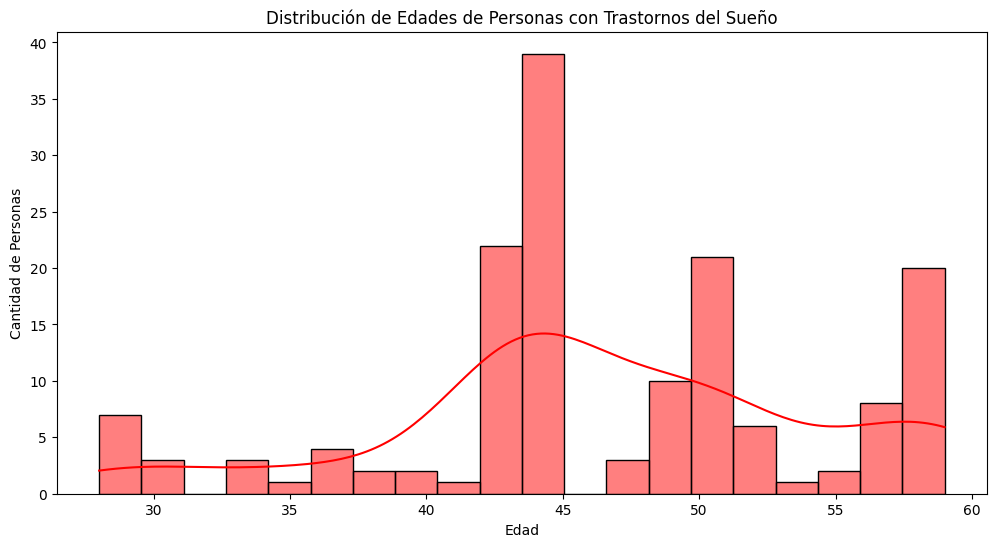

El rango de edad con la mayor frecuencia de trastornos del sueño es aproximadamente 43-46 años.


In [20]:
# Pregunta 6: ¿En qué rango de edades se encuentran la mayor cantidad de trastornos del sueño?
print("\n Pregunta 6: Rango de edad con más trastornos del sueño")
df_trastornos = df[df['Sleep Disorder'] != 'None']
plt.figure(figsize=(12, 6))
sns.histplot(data=df_trastornos, x='Age', kde=True, bins=20, color='red')
plt.title('Distribución de Edades de Personas con Trastornos del Sueño')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personas')
plt.show()
counts, bins = np.histogram(df_trastornos['Age'], bins=10)
max_count_index = np.argmax(counts)
rango_edad_max = f"{int(bins[max_count_index])}-{int(bins[max_count_index+1])} años"
print(f"El rango de edad con la mayor frecuencia de trastornos del sueño es aproximadamente {rango_edad_max}.")


 Pregunta 7: Pasos diarios vs. Calidad del sueño e IMC
La correlación entre los pasos diarios y la calidad del sueño es: 0.0168


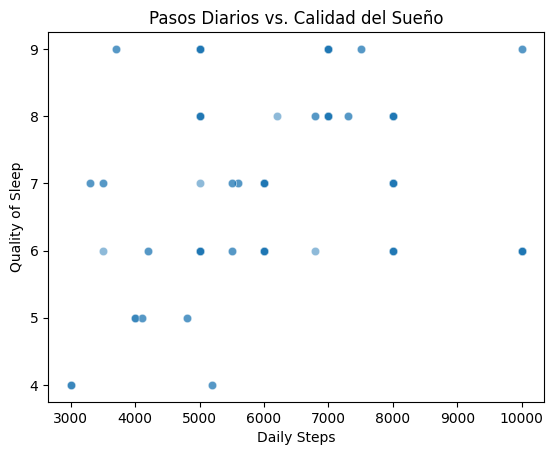

In [21]:
# Pregunta 7: La cantidad de pasos al día, ¿afecta la calidad del sueño? ¿al índice de masa corporal?
print("\n Pregunta 7: Pasos diarios vs. Calidad del sueño e IMC")
correlacion_pasos_sueno = df['Daily Steps'].corr(df['Quality of Sleep'])
print(f"La correlación entre los pasos diarios y la calidad del sueño es: {correlacion_pasos_sueno:.4f}")
sns.scatterplot(data=df, x='Daily Steps', y='Quality of Sleep', alpha=0.5)
plt.title('Pasos Diarios vs. Calidad del Sueño')
plt.show()



Analisis de Pasos Diarios por Categoria de IMC:


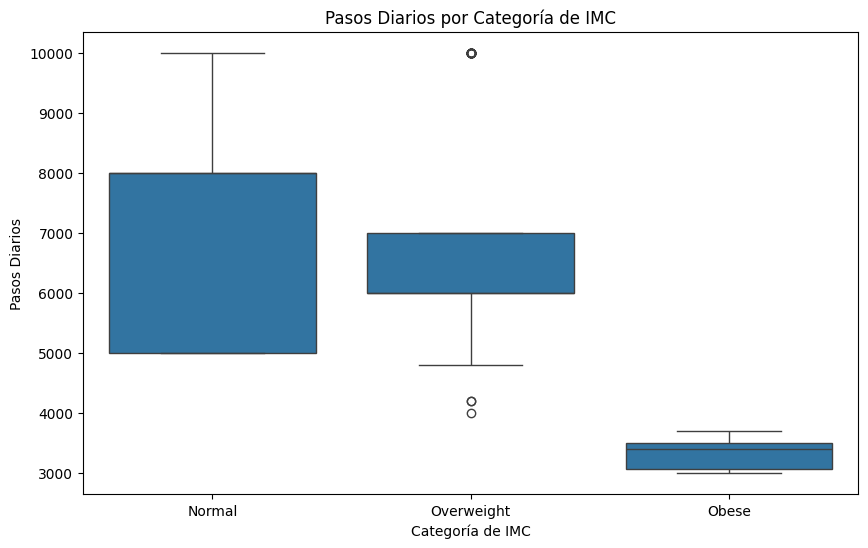

In [22]:
print("\nAnalisis de Pasos Diarios por Categoria de IMC:")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BMI Category', y='Daily Steps', order=['Normal', 'Overweight', 'Obese'])
plt.title('Pasos Diarios por Categoría de IMC')
plt.xlabel('Categoría de IMC')
plt.ylabel('Pasos Diarios')
plt.show()

In [23]:
# Modelo de Regresión Lineal (OLS) ---
print("\n 8. Modelo OLS para predecir la Calidad del Sueño")
y = df['Quality of Sleep']
features = [
    'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level',
    'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP',
    'Gender', 'Occupation', 'BMI Category'
]
X = df[features]

# Convertir variables categoricas en variables dummy
X = pd.get_dummies(X, columns=['Gender', 'Occupation', 'BMI Category'], drop_first=True)
X = X.astype(int)
X = sm.add_constant(X)

modelo_ols = sm.OLS(y, X).fit()
print("\nResumen del Modelo de Regresión Lineal (OLS)")
print(modelo_ols.summary())

# Interpretacion Final 
print("1. El modelo es excelente (R-cuadrado del 96.3%) y predice muy bien la calidad del sueño.")
print("\n2. Lo que mas importa para la calidad del sueño es:")
print("   - El nivel de estres es el factor más decisivo.")
print("   - La ocupacion y el IMC (Índice de Masa Corporal).")
print("\n3. Lo que no importa segun el modelo es:")
print("   - La Actividad Física, los Pasos Diarios o la Duración del Sueño.")


 8. Modelo OLS para predecir la Calidad del Sueño

Resumen del Modelo de Regresión Lineal (OLS)
                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     413.5
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          7.73e-236
Time:                        07:38:57   Log-Likelihood:                 18.313
No. Observations:                 374   AIC:                             9.375
Df Residuals:                     351   BIC:                             99.63
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [30]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv('./dataset/Dormir.csv', sep=';')
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'])
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'])
df.drop('Blood Pressure', axis=1, inplace=True)
df['Sleep Duration'] = df['Sleep Duration'] / 10
y = df['Quality of Sleep']
features = [
    'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level',
    'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP',
    'Gender', 'Occupation', 'BMI Category'
]
X = df[features]
X = pd.get_dummies(X, columns=['Gender', 'Occupation', 'BMI Category'], drop_first=True)
X = X.astype(int)
X = sm.add_constant(X)
modelo_ols = sm.OLS(y, X).fit()


# Preparar Nuevos Casos para la Predicción 
data_nuevos = {
    'Age': [21, 55],
    'Sleep Duration': [10, 12],
    'Physical Activity Level': [70, 55],
    'Stress Level': [8, 5],
    'Heart Rate': [60, 60],
    'Daily Steps': [5000, 8000],
    'Systolic_BP': [170, 150],
    'Diastolic_BP': [100, 95],
    'Gender': ['Male', 'Female'],
    'Occupation': ['Engineer', 'Nurse'],
    'BMI Category': ['Overweight', 'Normal']
}
casos_nuevos = pd.DataFrame(data_nuevos)
casos_nuevos_encoded = pd.get_dummies(casos_nuevos, columns=['Gender', 'Occupation', 'BMI Category'], drop_first=True)
casos_nuevos_aligned = casos_nuevos_encoded.reindex(columns = X.columns, fill_value=0)
casos_nuevos_aligned = casos_nuevos_aligned.astype(int)

# Realizar la Predicción
predicciones_raw = modelo_ols.predict(casos_nuevos_aligned)

# Se ajustan los resultados para que estén entre 1 y 10.
predicciones_reales = np.clip(predicciones_raw, 1, 10)

print("\n Predicciones Finales y utiles para el Mundo Real (escala 1-10)")
print(f"Hombre (21 años, Ingeniero): {predicciones_reales[0]:.2f}")
print(f"Mujer (55 años, Enfermera): {predicciones_reales[1]:.2f}")


 Predicciones Finales y utiles para el Mundo Real (escala 1-10)
Hombre (21 años, Ingeniero): 1.00
Mujer (55 años, Enfermera): 1.00


Respuesta Final de la Predicción
* Hombre (21 años, Ingeniero): El modelo predice una calidad de sueño la peor posible, ya que el cálculo fue 1.
* Mujer (55 años, Enfermera): El modelo tambien predice una calidad de sueño la peor posible, porque el cálculo fue 1